<img src="../imgs/bannerGA.jpg" style="width:900px;">

# Genetic Algorithms (GAs) 




## <span style="color:red"> Outline </span> 
1. **GAs: Introduction on computation**
2. **GAs: The Traveling Salesman Problem**
3. **GAs: Crossover, mutation, selection and reduction**
4. **GAs: Assembling and analysing examples **



## <span style="color:red"> 1. GAs introduction on computation </span> 

### From Biology

Bioinspired in biological concepts and its genetic-molecular base of knowledge. The following assumption could be considered: 

- Individuals who are more successful in surviving and attracting peers are more likely to generate a large number of descendants. 
- The genes of the best adapted individuals will spread in successive generations.
- The combination of some good features coming from different ancestors, can sometimes produce "super-individuals" descendants 


###  On Computation

We work with a population of individuals and each individual represents ** a solution ** to a particular problem.

- To each individual is assigned an score related with adaptation level (successful in surviving and attracting peers)
    - A major probability of reproducing and crossing genetic material
    - The crossing produces individuals who share characteristics of their parents (heritage).
    
- The crossover generates a new population, which has best features than ancestor populations. 
- The population will converge towards an optimal solution

##### Keywords
**selection, crossover, mutation, reduction**


## <span style="color:red"> 2. GAs: The Traveling Salesman Problem </span> 

We are dealing with NP problems (Non-deterministic search, polinomial check), in which an exhaustive search is  **impossible**.

The **TSP problem (Travelling Sales Person)**

El problema TSP (Travelling Sales Person) try to find a shorter route that passes through all the cities of a given set.


Refs:

- GA Tutorial [here](http://www.obitko.com/tutorials/genetic-algorithms/index.php)
- Compendium of NP Optimization Problems [here](http://www.csc.kth.se/~viggo/problemlist/)    
    

### Go to  simulate TSP problem: 

- Firstly, we go to generate a set of city locations.

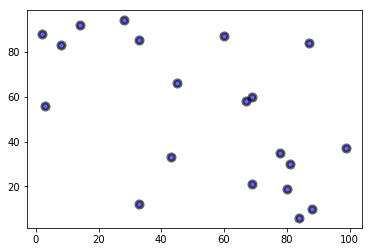

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
w_size = 100
n_cities = 20
cities = (np.random.random((n_cities,2))*w_size).astype(int) #<- this is random line
cities = np.array([[ 2,88],[87,84],[84,6],[99,37], [60, 87], [ 8, 83], [43, 33], [45, 66], [28, 94], [ 3, 56], [14, 92], [88, 10], [33, 12], [33, 85], [69, 60], [67, 58], [80, 19], [81, 30], [69, 21], [78, 35]])

plt.scatter(cities[:,0], cities[:,1],s=50, c= "blue", alpha=0.6, edgecolors="black", linewidths=3 )
#print cities

In [5]:
def TSP_plot_solution(cities, solution):
    plt.scatter(cities[:,0], cities[:,1],s=50, c= "blue", alpha=0.6, edgecolors="black", linewidths=3 ) 
    plt.plot(cities[solution,0].tolist()+[cities[solution[0],0]], cities[solution,1].tolist()+[cities[solution[0],1]])
    plt.scatter(cities[solution[0],0], cities[solution[0],1], marker="x", s=60, c="red", lw="5")
    plt.title("cost %.3f"%(TSP_cost(cities, solution)))
    
def TSP_cost(cities, solution):
    sol_cities = cities[solution]
    return np.sum(np.sqrt(np.sum((sol_cities - np.roll(sol_cities,-1, axis=0))**2, axis=1)))

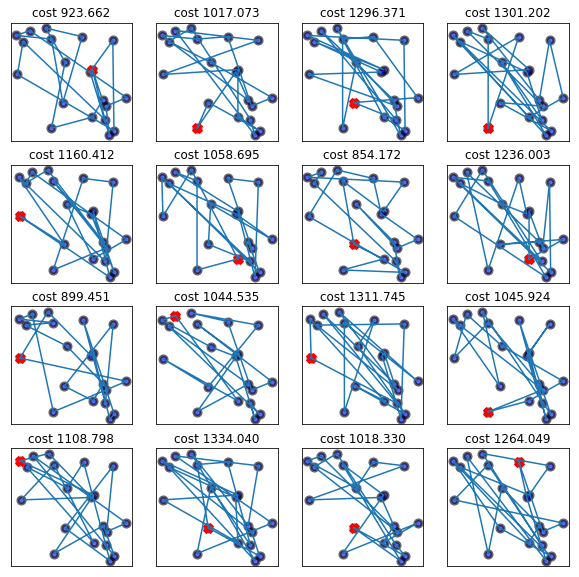

In [6]:
fig = plt.figure(figsize=(10,10))
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    one_solution = np.random.permutation(n_cities)
    TSP_plot_solution(cities, one_solution)
    ax.set_xticks([])
    ax.set_yticks([])

## <span style="color:orange">student</span>: 
- What about random line: 
    `cities = (np.random.random((n_cities,2))*w_size).astype(int)`
- Which kind of metric uses the function: ` TSP_cost(cities, solution)`
- Which means: `cities[solution,0].tolist()+[cities[solution[0],0]]`

## <span style="color:red"> 3. GAs:crossover, mutation, selection and reduction </span> 

### GAs structure: from biological concepts to computational terms. 


- Each **solution** is represented by a set of parameters named: **"genes"**
- Each group of **genes** represents a solution named **chromosome**. In general is can be denominated **fenotype**
- The **adaptation function** assigns a value to a particular **chromosome** that represent a level of adaptation. 
- During **Reproduction** is selected the parents and their **chromosome** are combined using operations of **crossover** and **mutation**
    - Well-adapted organisms can be chosen several times
    
**GO to the action!**    

#### 1) Se inicia aleatoriamente una población

In [7]:
def TSP_initialize_population(n_individuals, n_cities):
    r = []
    for i in xrange(n_individuals):
        r.append(np.random.permutation(n_cities))
    return np.array(r)

## <span style="color:orange">student</span>: 
- What are we doing here?
- Which is the output

#### 2) The  **crossover operator**

From two selected parents, the chromosome are split on random positions to produce one, two or several new chromosomes

In [8]:
def TSP_cross_over(solution1, solution2):
    l = len(solution1)
    cstart = np.random.randint(l)
    cend   = np.random.randint(l-cstart)+cstart+1
    r = np.zeros(l)
    s1part = solution1[cstart:cend]
    r[cstart:cend] = s1part
    c = 0
    for i in range(l):
        c = cend if c==cstart else c
        if not solution2[i] in s1part:
            r[c]=solution2[i]
            c += 1
            
    return r


## <span style="color:orange">student</span>: 
- What are we doing here?
- How many chromosomes return this kind of crossover?

#### 3) The **mutation operator**
It is applied to each children which randomly alter each *gene* of chromosome. Such change is namely performed with a low probability, so, change a little!

In [9]:
def TSP_mutate(solution, mutation_prob):
    mutated_solution = np.copy(solution)
    for i in range(len(solution)):
        if np.random.random()<mutation_prob:
            j = i+1 if i!=len(solution)-1 else 0
            tmp = mutated_solution[i]
            mutated_solution[i] = mutated_solution[j]
            mutated_solution[j] = tmp
    return mutated_solution

In [10]:
def TSP_plot_GA_result(best, bests, means, stds):
    fig = plt.figure(figsize=(12,4))
    fig.add_subplot(121)
    plot_evolution(bests, means, stds)
    fig.add_subplot(122)
    TSP_plot_solution(cities, best)

## <span style="color:red"> 4. GAs: Assembling and analysing examples </span> 

### Genaral Genetic algorithm

In [70]:
%%writefile ../code/ga.py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

def plot_evolution(bests, means, stds):
    plt.plot(means, label="means")
    plt.plot(bests, label="bests")
    plt.fill_between(range(len(means)), means-stds, means+stds, color="yellow", alpha=0.2)
    plt.legend()
    

def run_ga(pop_size, init_population_function, 
           mutation_function, crossover_function, cost_function, 
           crossover_prob, mutation_prob, n_iters):

    pop = init_population_function(pop_size)
    n_xover_indivs = int(pop_size * crossover_prob)

    means = []
    stds  = []
    best_costs = []
    best = None

    for i in tqdm(range(n_iters)):

        #if i%(n_iters/10)==0:
        # print i
        
        # do cross over
        offsprings = []
        permut_temp = np.random.permutation(len(pop))
        idx_xover_indivs = permut_temp[n_xover_indivs:]
        #print "permut_temp: ", permut_temp
        #print "idx_xover_indivs: ", idx_xover_indivs
        for idx in idx_xover_indivs:
            idx_counterpart = np.random.randint(len(pop))
            i1 = pop[idx]
            i2 = pop[idx_counterpart]
            offs = crossover_function(i1,i2)
            offsprings.append(offs)
        offsprings = np.array(offsprings)

        pop = np.vstack((pop, offsprings)).astype(int)

        # mutate population
        for j in xrange(len(pop)):
            pop[j] = mutation_function(pop[j], mutation_prob)

        # select best to maintain pop_size fixed
        costs = np.array([cost_function(j) for j in pop])
        top_idxs  = np.argsort(costs)[:pop_size]
        pop = pop[top_idxs]

        costs = costs[top_idxs]

        means.append(np.mean(costs))
        stds.append(np.std(costs))
        best_costs.append(np.min(costs))
        
        if best is None or np.min(costs) < cost_function(best):
             best = pop[np.argmin(costs)]

    means      = np.array(means)
    stds       = np.array(stds)
    best_costs = np.array(best_costs)
    
    
    return best, best_costs, means, stds


Overwriting ../code/ga.py


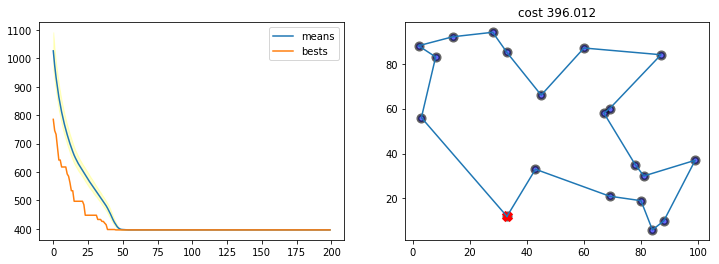

In [63]:
%run ../code/ga.py

r =  run_ga(pop_size=1000, 
               init_population_function = lambda x: TSP_initialize_population(x, n_cities), 
               mutation_function        = TSP_mutate, 
               crossover_function       = TSP_cross_over,
               cost_function            = lambda x: TSP_cost(cities, x), 
               crossover_prob           = 0.001,
               mutation_prob            = 0.001, 
               n_iters                  = 200)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

Con una probabilidad de mutación muy pequeña

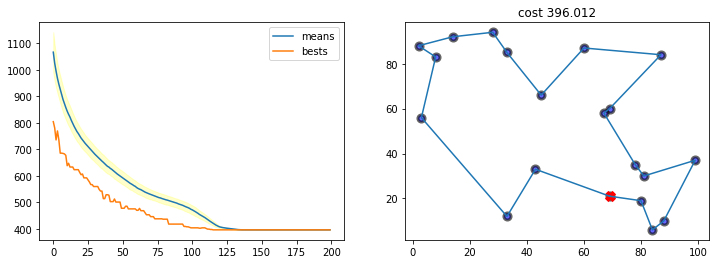

In [14]:
r =  run_ga(pop_size=1000, 
               init_population_function = lambda x: TSP_initialize_population(x, n_cities),  
               mutation_function        = TSP_mutate, 
               crossover_function       = TSP_cross_over,
               cost_function            = lambda x: TSP_cost(cities, x), 
               crossover_prob           = 0.5,
               mutation_prob            = 0.01, 
               n_iters                  = 200)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

Con una probabilidad de cruce muy pequeña

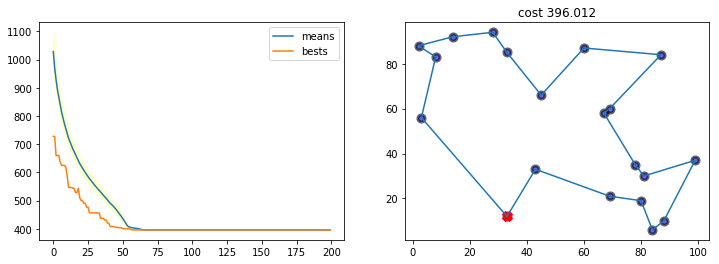

In [15]:
r =  run_ga(pop_size=1000, 
               init_population_function = lambda x: TSP_initialize_population(x, n_cities),  
               mutation_function        = TSP_mutate, 
               crossover_function       = TSP_cross_over,
               cost_function            = lambda x: TSP_cost(cities, x), 
               crossover_prob           = 0.01,
               mutation_prob            = 0.001, 
               n_iters                  = 200)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

Con una probabilidad de mutación muy alta

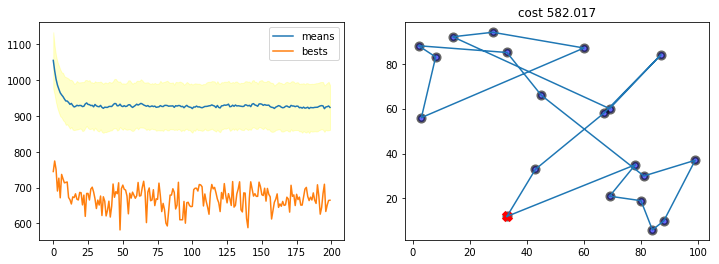

In [16]:
r =  run_ga(pop_size=1000, 
               init_population_function = lambda x: TSP_initialize_population(x, n_cities), 
               mutation_function        = TSP_mutate, 
               crossover_function       = TSP_cross_over,
               cost_function            = lambda x: TSP_cost(cities, x), 
               crossover_prob           = 0.5,
               mutation_prob            = 0.9, 
               n_iters                  = 200)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

## <span style="color:orange"> Student Challenge</span>: 
- Change the crossover function usign next the following logic: 
<img src='../imgs/ga_1.png' style="width:450px;">
**Nota:** La primera parte de los descendiantes debe ser copiada exactamente del los respectivos padres, pero tenga cuidado de no repetir ciudades en el segmento complementario. 

La primera parte es del 40% de la longitud de la solución

In [71]:
def TSP_cross_over_2(solution1, solution2):
        
    return r[0], r[1]

In [72]:
TSP_cross_over_2([0,1,2,3,4], [3,2,1,0,4])

(array([ 0.,  1.,  3.,  2.,  4.]), array([ 3.,  2.,  0.,  1.,  4.]))

- Change the mutation function usign next the following logic: 
<img src='../imgs/ga_2.png' style="width:450px;">

In [58]:
def TSP_mutate_2(solution, mutation_prob):

    return mutated_solution

- Run the GA with this new scheme, which is better?

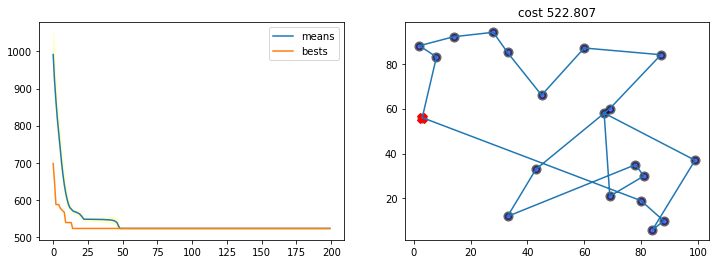

In [75]:
%run ../code/ga2.py

r =  run_ga(pop_size=1000, 
               init_population_function = lambda x: TSP_initialize_population(x, n_cities), 
               mutation_function        = TSP_mutate_2, 
               crossover_function       = TSP_cross_over_2,
               cost_function            = lambda x: TSP_cost(cities, x), 
               crossover_prob           = 0.001,
               mutation_prob            = 0.001, 
               n_iters                  = 200)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

In [74]:
%%writefile ../code/ga2.py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

def plot_evolution(bests, means, stds):
    plt.plot(means, label="means")
    plt.plot(bests, label="bests")
    plt.fill_between(range(len(means)), means-stds, means+stds, color="yellow", alpha=0.2)
    plt.legend()
    

def run_ga(pop_size, init_population_function, 
           mutation_function, crossover_function, cost_function, 
           crossover_prob, mutation_prob, n_iters):

    pop = init_population_function(pop_size)
    n_xover_indivs = int(pop_size * crossover_prob)

    means = []
    stds  = []
    best_costs = []
    best = None

    for i in tqdm(range(n_iters)):

        #if i%(n_iters/10)==0:
        # print i
        
        # do cross over
        offsprings = []
        permut_temp = np.random.permutation(len(pop))
        idx_xover_indivs = permut_temp[n_xover_indivs:]
        #print "permut_temp: ", permut_temp
        #print "idx_xover_indivs: ", idx_xover_indivs
        for idx in idx_xover_indivs:
            idx_counterpart = np.random.randint(len(pop))
            i1 = pop[idx]
            i2 = pop[idx_counterpart]
            offs1, offs2 = crossover_function(i1,i2)
            offsprings.append(offs1)
            offsprings.append(offs2)
        offsprings = np.array(offsprings)

        pop = np.vstack((pop, offsprings)).astype(int)

        # mutate population
        for j in xrange(len(pop)):
            pop[j] = mutation_function(pop[j], mutation_prob)

        # select best to maintain pop_size fixed
        costs = np.array([cost_function(j) for j in pop])
        top_idxs  = np.argsort(costs)[:pop_size]
        pop = pop[top_idxs]

        costs = costs[top_idxs]

        means.append(np.mean(costs))
        stds.append(np.std(costs))
        best_costs.append(np.min(costs))
        
        if best is None or np.min(costs) < cost_function(best):
             best = pop[np.argmin(costs)]

    means      = np.array(means)
    stds       = np.array(stds)
    best_costs = np.array(best_costs)
    
    
    return best, best_costs, means, stds


Writing ../code/ga2.py


---
# <center> Thanks! </center>